In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [6]:
# Assign the measurements class to a variable called `Measurement`
Measurement = Base.classes.measurements

# Assign the stations class to a variable called `Stations`
Station = Base.classes.stations

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Using the inspector to print the column names within the 'measurements' table and its types
columns = inspector.get_columns('measurements')
for column in columns:
    print(column["name"], column["type"])

measurement_id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [9]:
# Using the inspector to print the column names within the 'stations' table and its types
columns = inspector.get_columns('stations')
for column in columns:
    print(column["name"], column["type"])

station_id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Create a session
session = Session(engine)

In [11]:
# Use the session to query the last 12 months of precipitation data.
query = (session
         .query(Measurement.date, Measurement.prcp)
         .order_by(Measurement.date.desc())
         .filter(Measurement.date.between('2017-02-23', '2017-08-23'))
         .all())


for row in query:
    print(row)

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11', 0.0)
('2017-08-11', 0.0)
('2017-08-11', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.07

In [12]:
# Load the results into a pandas dataframe. Set the index to the `date`
df = pd.DataFrame(query, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head(10)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


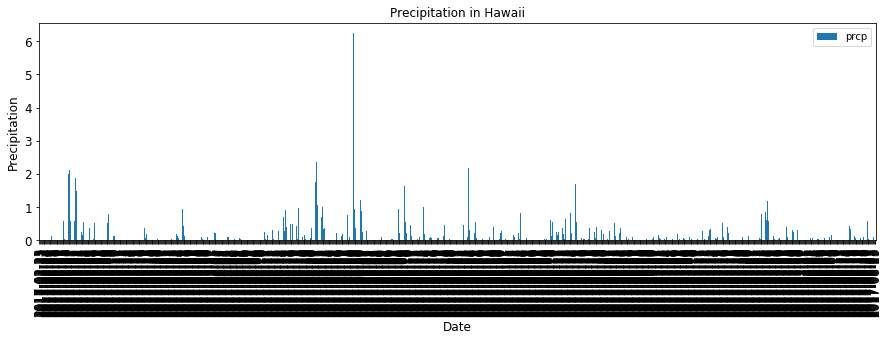

In [13]:
# Plot the dataframe as a bar chart using pandas plotting
ax = df.iloc[::-1].plot(kind='bar', title='Precipitation in Hawaii', subplots=False, figsize=(15,4), 
                                    legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Precipitation", fontsize=12)
plt.show()